In [73]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture


from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from silhouette import silhouette
import matplotlib.cm as cm

%matplotlib inline


In [49]:
X = pd.read_pickle('../homework1/X.pkl')
y = pd.read_pickle('../homework1/y.pkl')
income = pd.read_csv('../homework1/adult.csv')

In [50]:
country_counts = income['native.country'].value_counts()
country_counts_df = country_counts.to_frame(name='counts')
small = list(country_counts_df[country_counts_df.counts<100].index)
income_modified = income.copy()
income_modified.loc[income['native.country'].apply(lambda x:x in small+['?']),['native.country']] = 'other'
income_modified.loc[income_modified.workclass.apply(lambda x:x in ['?']),['occupation','workclass']] = ('other','other')

income_modified.drop(['fnlwgt','education','income'],axis=1,inplace=True)

le = preprocessing.LabelEncoder()

for item in income_modified.columns[income_modified.dtypes==object]:
    income_modified[item] = le.fit_transform(income_modified[item])

In [51]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [52]:
income_modified.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,15,1,4,0,0,4356,40,7
1,82,3,9,6,4,1,4,0,0,4356,18,7
2,66,8,10,6,15,4,2,0,0,4356,40,7
3,54,3,4,0,7,4,4,0,0,3900,40,7
4,41,3,10,5,10,3,4,0,0,3900,40,7


In [4]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
income_modified_stan = StandardScaler().fit_transform(income_modified)

In [3]:
X_stan = StandardScaler().fit_transform(X)


In [12]:
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X_stan)

KMeans(n_clusters=9, random_state=0)

In [ ]:
kmeans.

In [27]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

1    28460
6     1485
0      752
5      635
7      520
3      493
2      159
4       57
Name: labels, dtype: int64

In [97]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

4    10507
2     9509
0     6470
5     1826
7     1569
1     1361
3     1114
6      198
8        7
Name: labels, dtype: int64

In [15]:
sum(kmeans.labels_)

159

In [17]:
kmeans.labels_.var()

0.004859297329838416

In [34]:
kmeans.cluster_centers_[0].shape

(59,)

In [35]:
X.shape

(32561, 59)

In [5]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=9, random_state=10)
gm.fit(X_stan)

GaussianMixture(n_components=9, random_state=10)

In [99]:
pd.DataFrame(gm.fit_predict(X_stan),columns=['label']).label.value_counts()

2    11655
1     7049
5     5117
3     3148
4     2487
6     1986
0      914
8      198
7        7
Name: label, dtype: int64

In [100]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

4    10507
2     9509
0     6470
5     1826
7     1569
1     1361
3     1114
6      198
8        7
Name: labels, dtype: int64

In [101]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
kmeans.labels_[[0,2]]

array([5, 5])

In [113]:
pd.DataFrame(kmeans.labels_[X['native.country_Canada']==1])[0].value_counts()

4    38
2    32
0    21
5    14
7     8
3     6
1     2
Name: 0, dtype: int64

In [115]:
pd.DataFrame(kmeans.labels_[X['native.country_other']==1])[0].value_counts()

4    631
2    584
0    419
5    100
3     95
1     84
7     59
Name: 0, dtype: int64

In [8]:
gm.bic(X_stan)

-5461387.248276959

In [19]:
ks = [2,4,6,8,15,20,200,2000]

In [20]:
ks = [2,4,6,8,15,20,200,2000]
total = []
for k in ks:
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(X_stan)
    total.append(gms.aic(X_stan))

In [127]:
gm.bic(X_stan)

-5461387.248267755

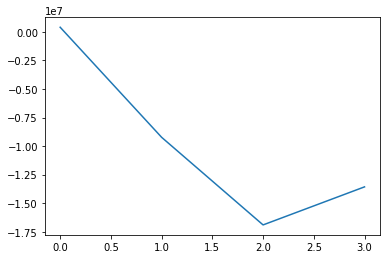

In [21]:
plt.plot(total)

In [22]:
total

[404155.31543551694,
 -9233085.073935254,
 -16905036.02515985,
 -13573377.643168036]

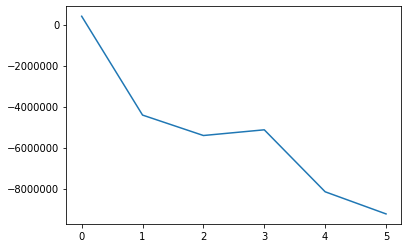

In [18]:
plt.plot(total)

In [15]:
total

[404155.31543551694,
 -4414096.212592142,
 -5410495.864073624,
 -5132498.955486961]

In [11]:
total

[434857.51071274735,
 -4352683.431167149,
 -5318372.496500868,
 -5009665.001766442]

In [37]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(32561, 2)

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
n_neighbors=2

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


Text(0.5,0.98,'Manifold Learning with 1000 points, 2 neighbors')

<Figure size 1080x576 with 0 Axes>

In [48]:
from sklearn import manifold, datasets

n_points = 1000
X1, color = datasets.make_s_curve(32561, random_state=0)

In [49]:
color

array([ 0.46005644,  2.028112  ,  0.968522  , ...,  1.21266926,
       -1.72622701,  3.92248014])

In [53]:
i=0
ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)
#ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


(-96.01885854184566, 94.52276479184572, -96.44877498336895, 96.06880061813457)

In [52]:
X_embedded[:, 0]

array([ 13.125074,  13.12485 ,  13.125004, ...,  35.173664,  50.48359 ,
       -35.992203], dtype=float32)

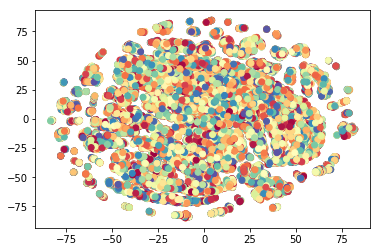

In [54]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)

In [56]:
X_embedded.shape

(32561, 2)

In [57]:
X_embedded[:10]

array([[ 13.125074, -74.85138 ],
       [ 13.12485 , -74.8513  ],
       [ 13.125004, -74.8514  ],
       [ 13.147255, -74.8633  ],
       [ 13.147282, -74.86335 ],
       [ 13.158456, -74.87092 ],
       [ 13.158326, -74.87084 ],
       [ 13.169389, -74.87893 ],
       [ 13.169538, -74.879005],
       [ 14.169823, -75.68437 ]], dtype=float32)

In [46]:
income = pd.read_csv('../homework1/adult.csv')

In [60]:
income.na

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [66]:
gm.fit_predict(X).size

32561

In [65]:
kmeans.labels_.size

32561

In [67]:
kmeans.cluster_centers_

array([[ 4.49015957e+01,  1.14428191e+01,  7.83119681e+03,
         1.40687462e-12,  4.43577128e+01,  5.18617021e-02,
         9.30851064e-02,  1.40946282e-18,  6.13031915e-01,
         6.51595745e-02,  9.04255319e-02,  5.31914894e-02,
         2.81892565e-18,  3.32446809e-02,  8.37765957e-02,
         1.32978723e-03,  7.81914894e-01,  5.31914894e-03,
         9.97340426e-02,  1.19680851e-02,  1.59574468e-02,
         8.90957447e-02,  4.39101880e-18,  1.19680851e-01,
         2.35372340e-01,  2.39361702e-02,  1.46276596e-02,
         3.19148936e-02,  1.40946282e-18,  2.39361702e-02,
         8.32667268e-17,  2.24734043e-01,  2.12765957e-02,
         1.14361702e-01,  2.26063830e-02,  4.52127660e-02,
         3.32446809e-02,  6.94148936e-01,  1.39627660e-01,
         6.64893617e-03,  2.12765957e-02,  5.71808511e-02,
         8.11170213e-02,  7.97872340e-03,  2.92553191e-02,
         6.25000000e-02,  5.31914894e-03,  8.94946809e-01,
         1.79521277e-01,  8.20478723e-01,  3.98936170e-0

In [91]:
kmeans.cluster_centers_

array([[-8.09759290e-02,  1.13616720e-01, -5.45911907e-02,
        -3.10696539e-02,  4.37958117e-02,  4.60364702e-02,
         2.50801410e-02, -1.46638105e-02,  2.58241186e-01,
        -6.18588179e-02, -2.81740534e-01,  5.74847829e-02,
        -2.07399897e-02, -2.44450198e-01,  4.33973789e-01,
        -2.65869483e-02, -9.20916156e-01,  9.04530986e-02,
         5.52330386e-01,  1.03793144e-01,  1.34223956e-01,
         1.30623178e-01,  1.63441757e-02, -9.24124749e-02,
        -9.63902247e-04, -7.31091389e-02, -2.77271700e-03,
         7.33215277e-04, -1.46638105e-02,  8.24548435e-02,
         6.21338502e-02,  1.00397221e-01, -8.29639299e-03,
        -7.85524448e-03,  5.43529014e-02, -4.37409647e-02,
        -2.44450198e-01, -8.25333347e-01,  1.70804794e+00,
        -1.75448130e-01, -4.28589866e-01, -3.44032316e-01,
        -2.24926808e-01, -9.82008699e-02, -3.81030984e-02,
         1.43335897e-02,  4.91678373e-03,  3.28205715e-02,
         3.04587093e-01, -3.04587093e-01,  8.73735220e-0

In [94]:
X_stan[0].shape

(59,)

In [68]:
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 8,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [50]:
X_standard = X_stan.copy()

In [51]:
X_stan = X_stan[X_stan['capital.gain']<99999]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

For n_clusters = 2 The average silhouette_score is : 0.08171694863868836
For n_clusters = 4 The average silhouette_score is : 0.0858816062531556
For n_clusters = 6 The average silhouette_score is : 0.09556409402257389
For n_clusters = 8 The average silhouette_score is : 0.07691835098548624


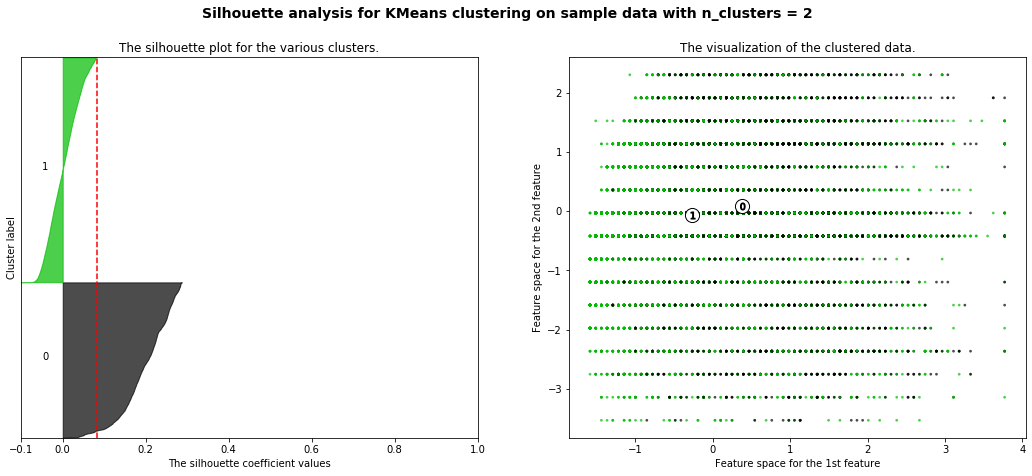

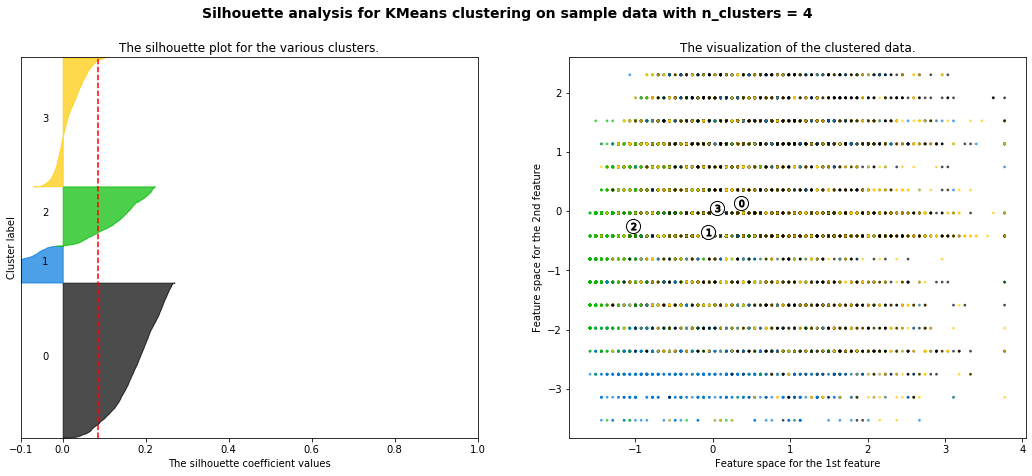

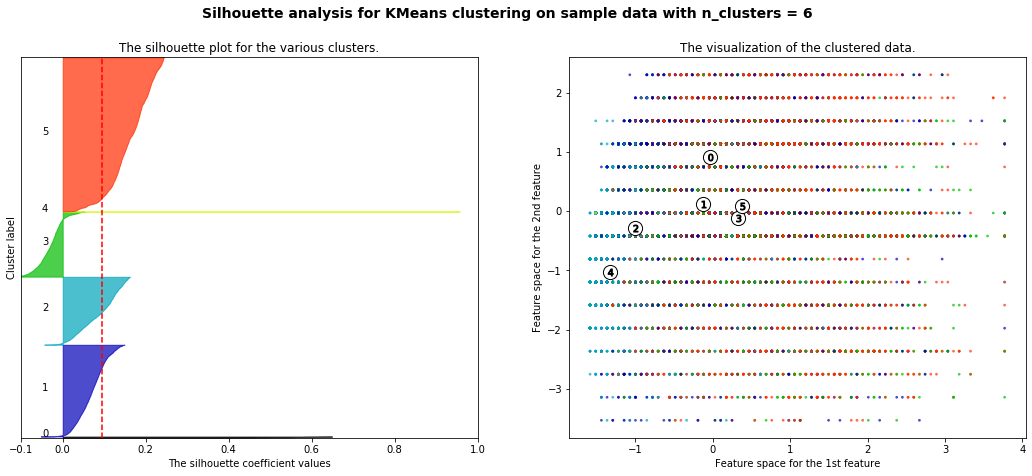

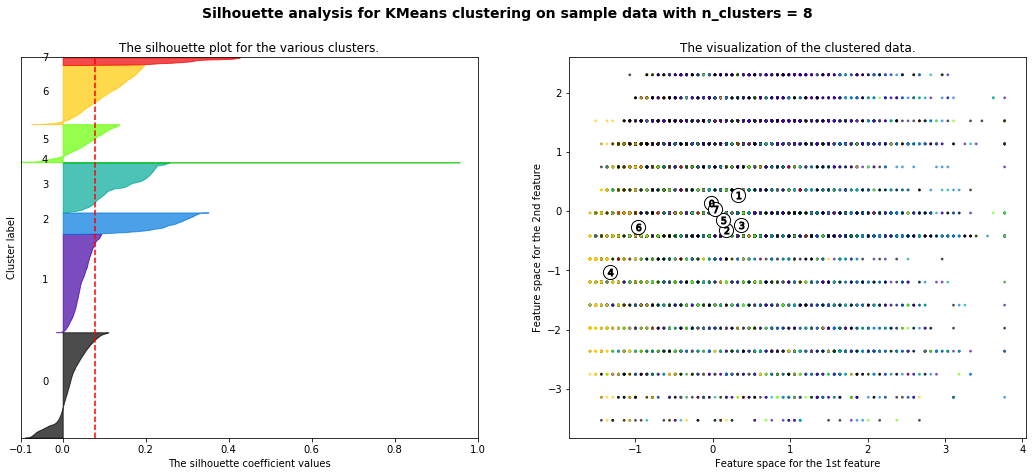

In [27]:
import matplotlib.cm as cm

range_n_clusters = [2, 4,  6,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_stan) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_stan)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_stan, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_stan, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_stan[:, 0], X_stan[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

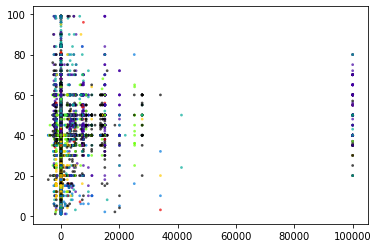

In [43]:
    plt.scatter(X.iloc[:,2]-X.iloc[:, 3], X.iloc[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

In [33]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
X.iloc[:,2:4].describe()

,capital.gain,capital.loss
count,32561.000000,32561.000000
mean,1077.648844,87.303830
std,7385.292085,402.960219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,4356.000000


In [44]:
X.iloc[:,2:4].max()

capital.gain    99999
capital.loss     4356
dtype: int64

In [55]:
income[income['capital.gain']==0].shape

(29849, 15)

In [53]:
income[income['capital.loss']==0].shape

(31042, 15)

In [58]:
income[(income['capital.gain']>0)|(income['capital.gain']>0)].shape

(2712, 15)

In [71]:
from silhouette import silhouette

In [70]:
KMeans

sklearn.cluster._kmeans.KMeans

In [73]:
X_stan

array([[ 3.76961234, -0.42005962, -0.14592048, ..., -0.05927412,
         0.34095391, -0.25390474],
       [ 3.18311167, -0.42005962, -0.14592048, ..., -0.05927412,
         0.34095391, -0.25390474],
       [ 2.01011032, -0.03136003, -0.14592048, ..., -0.05927412,
         0.34095391, -0.25390474],
       ...,
       [ 0.10398314, -0.42005962, -0.14592048, ..., -0.05927412,
         0.34095391, -0.25390474],
       [ 1.42360965, -0.42005962, -0.14592048, ..., -0.05927412,
         0.34095391, -0.25390474],
       [-1.21564337, -0.42005962, -0.14592048, ..., -0.05927412,
         0.34095391, -0.25390474]])

In [74]:
type(X_stan)

numpy.ndarray

In [75]:
with open('test.npy', 'wb') as f:
    np.save(f, X_stan)

In [15]:
[x for x in .columns if 'work' in x]

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'workclass_other',
 'occupation_Never-worked']

1
2
For n_clusters = 2 The average silhouette_score is : 0.6866712759041652
1
2
For n_clusters = 4 The average silhouette_score is : 0.15488300271215696
1
2
For n_clusters = 6 The average silhouette_score is : 0.16887262333301237
1
2
For n_clusters = 8 The average silhouette_score is : 0.168037432132915


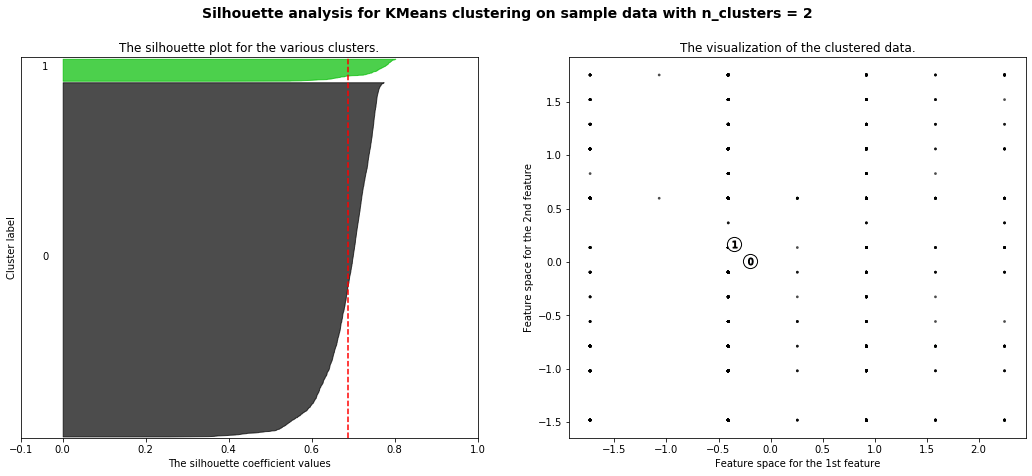

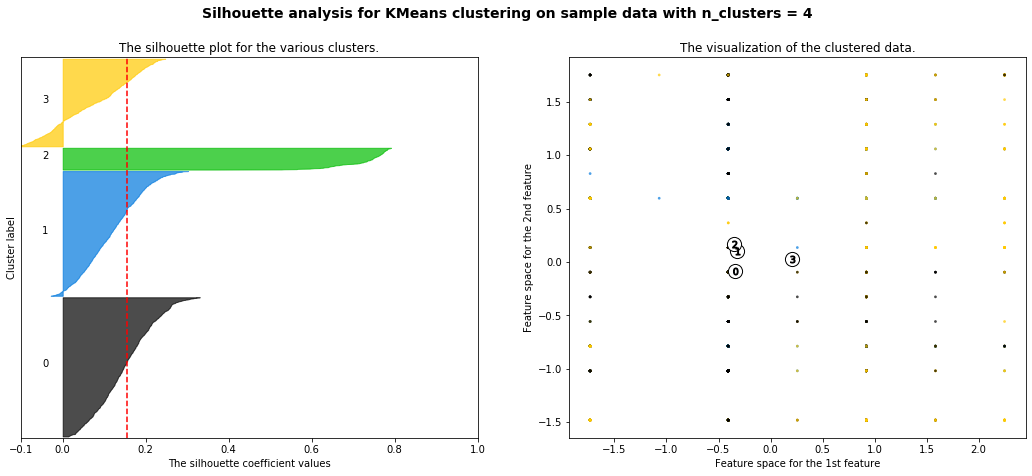

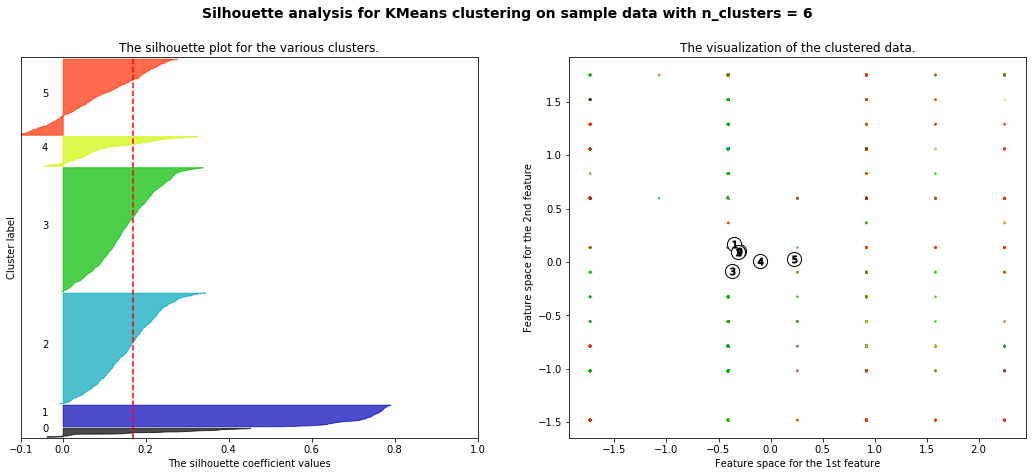

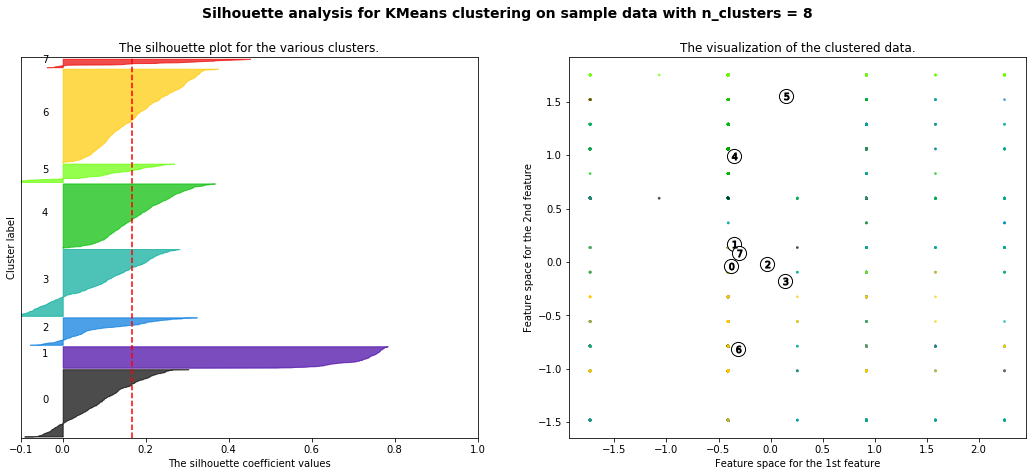

In [88]:
silhouette(pos,columns=[3,4])

1
2
For n_clusters = 2 The average silhouette_score is : 0.1652386576016733
1
2
For n_clusters = 4 The average silhouette_score is : 0.17492975757250373
1
2
For n_clusters = 6 The average silhouette_score is : 0.15894155185409176
1
2
For n_clusters = 8 The average silhouette_score is : 0.18507338932677941


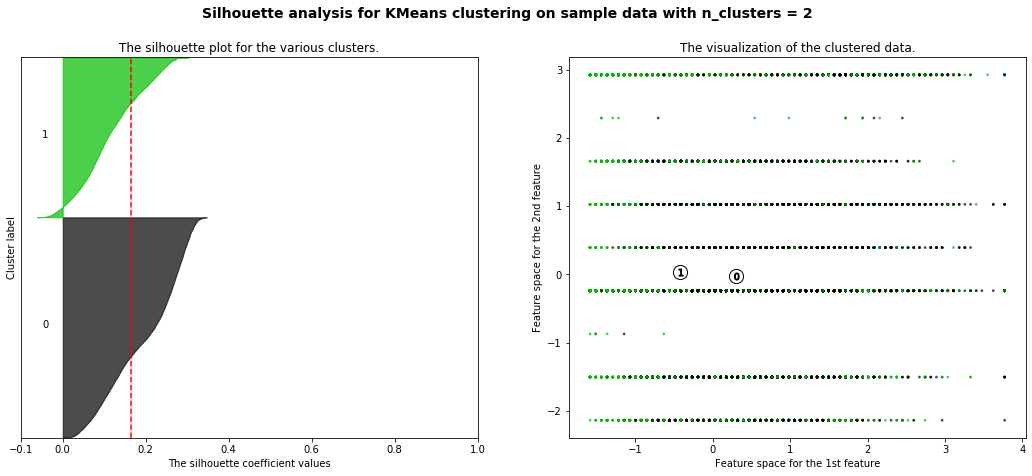

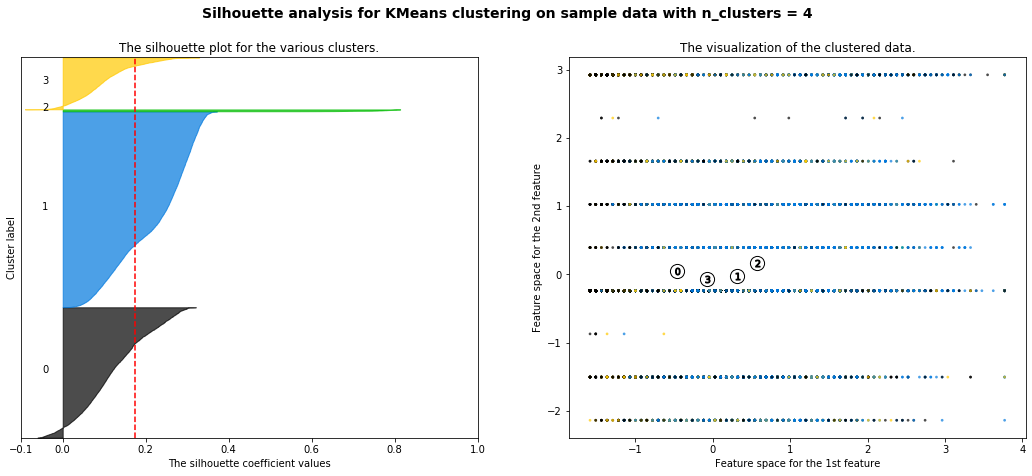

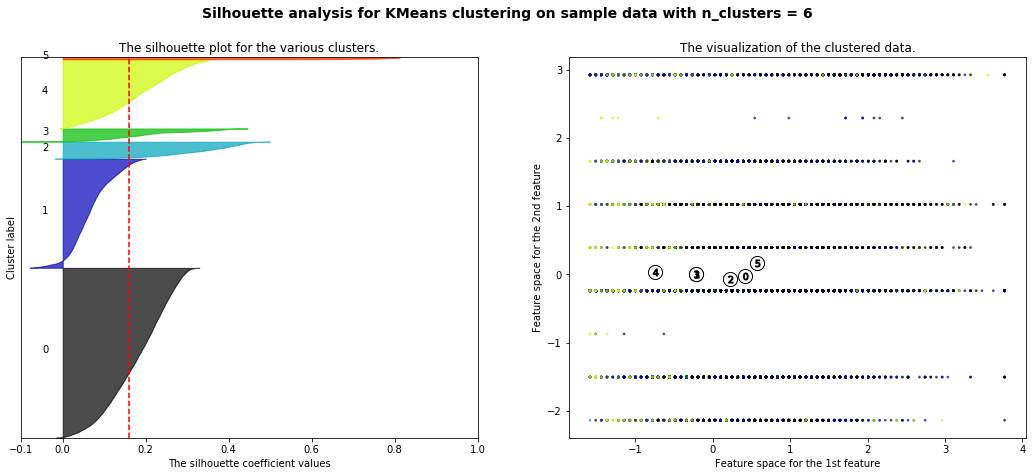

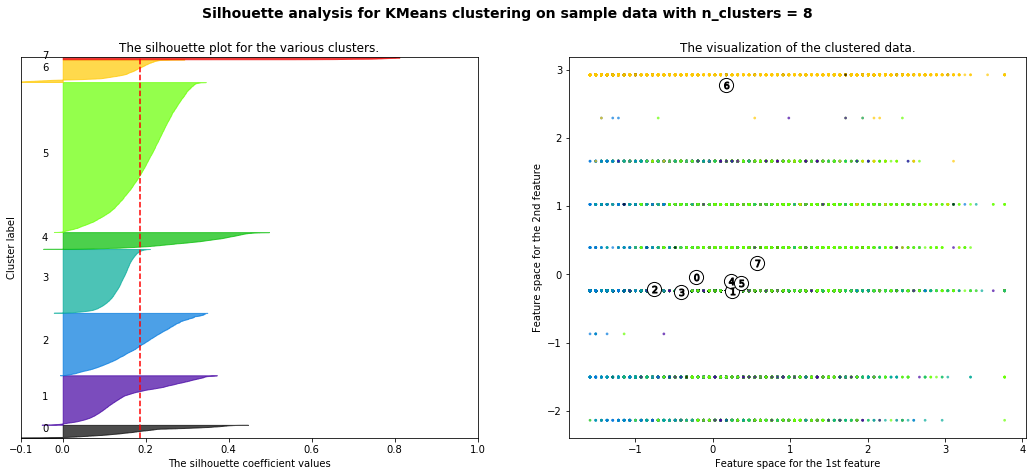

In [56]:
silhouette(income_modified_stan)

In [57]:
income_modified_stan[0]

array([ 3.76961234,  2.92262342, -0.42005962,  2.24948009,  1.75152457,
       -0.27780504,  0.39366753, -1.42233076, -0.14592048, 10.59350656,
       -0.03542945,  0.11053875])

In [58]:
income_modified.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,15,1,4,0,0,4356,40,7
1,82,3,9,6,4,1,4,0,0,4356,18,7
2,66,8,10,6,15,4,2,0,0,4356,40,7
3,54,3,4,0,7,4,4,0,0,3900,40,7
4,41,3,10,5,10,3,4,0,0,3900,40,7


In [61]:
ks = [2,4,6,8,15,20,200,2000]
total = []
for k in ks:
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(income_modified_stan)
    total.append(gms.aic(income_modified_stan))

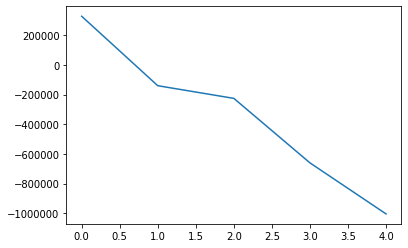

In [66]:
plt.plot(total[:5])

In [92]:
import time
start = time.time()
ks = [20,200,500,1000,2000,2500]
total = []
for k in ks:
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(income_modified_stan)
    total.append(gms.aic(income_modified_stan))
print(time.time()-start)

KeyboardInterrupt: 

In [68]:
pos = income_modified_stan[(income['capital.gain']>0)|(income['capital.gain']>0)]

In [69]:
silhouette(pos,columns=[])

array([[ 1.13035932,  0.39419988,  1.91213796, ..., -0.21665953,
         1.58436587,  0.11053875],
       [ 0.98373415, -0.23790601, -0.42005962, ..., -0.21665953,
        -0.03542945,  1.29645383],
       [ 1.05704673,  0.39419988, -0.42005962, ..., -0.21665953,
        -0.03542945,  0.11053875],
       ...,
       [-0.40920495, -0.23790601, -1.97485801, ..., -0.21665953,
         1.17941704,  0.11053875],
       [-0.04264203, -0.23790601, -1.58615841, ..., -0.21665953,
        -0.03542945,  0.11053875],
       [-0.99570562, -0.23790601, -0.42005962, ..., -0.21665953,
        -0.03542945,  0.11053875]])

In [70]:
income_modified.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,15,1,4,0,0,4356,40,7
1,82,3,9,6,4,1,4,0,0,4356,18,7
2,66,8,10,6,15,4,2,0,0,4356,40,7
3,54,3,4,0,7,4,4,0,0,3900,40,7
4,41,3,10,5,10,3,4,0,0,3900,40,7


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


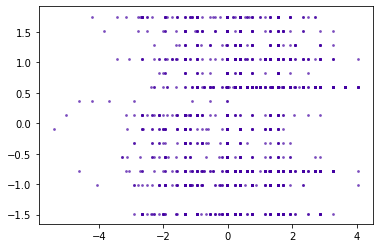

In [87]:
    plt.scatter(pos[:,2]-pos[:, 3], pos[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

In [78]:
colors = cm.nipy_spectral(1 / 8)


In [85]:
income_modified.iloc[:,2].shape

(32561,)